In [1]:
# code logistic regression from scratch

In [415]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [5]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

In [61]:
# gradient of sigmoid
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

x, delta = .1, 1e-6
((sigmoid(x + delta) - sigmoid(x)) / delta - sigmoid_prime(x)) < 1e-6

True

In [396]:
def auc(label, score):
    """Assuming no ties in score."""
    label, score = np.array(label, dtype=bool), np.array(score, dtype=float)
    return (score[label] > score[~label].reshape(-1, 1)).mean()

print(auc([0, 0, 1, 1], [.2, .4, .6, .8]), 
      auc([1, 1, 0, 0], [.2, .4, .6, .8]),
      auc([0, 1, 1, 0], [.2, .4, .6, .8]))

1.0 0.0 0.5


In [397]:
def log_loss(label, score):
    label, score = np.array(label, dtype=bool), np.array(score, dtype=float)    
    return -1. / len(label) * (label * np.log(score) + (1 - label) * np.log(1 - score)).sum() 

print(log_loss([0, 0, 1, 1], [.2, .4, .6, .8]), 
      log_loss([1, 1, 0, 0], [.2, .4, .6, .8]),
      log_loss([0, 1, 1, 0], [.2, .4, .6, .8]))

0.3669845875401002 1.2628643221541278 0.814924454847114


In [519]:
np.random.seed(1234)
n, m = 10000, 20
X = np.random.randn(n, m)
true_coef = np.random.randn(m)
true_bias = np.random.randn()
noise = 3 * np.random.randn(n)
y = (sigmoid(X.dot(true_coef) + true_bias + noise) < .5).astype(int)
y.mean()

0.5217

In [510]:
X.dot(true_coef).shape

(10000,)

In [511]:
np.random.seed(123)
frac_test = .2
test_idx = np.random.random(len(X)) < frac_test
X_train, X_test, y_train, y_test = X[~test_idx], X[test_idx], y[~test_idx], y[test_idx]

In [512]:
np.random.seed(456)
coef = np.random.random(m)
bias = np.random.randn()
y_pred = sigmoid(X_train.dot(coef) + bias)
print(log_loss(y_train, y_pred), auc(y_train, y_pred))

1.1864270523884 0.5315228927209636


In [515]:
rate = 0.01
n_steps = 2000
stats = []
for i in range(n_steps):
    gr = 1. / len(X) * (sigmoid(X_train.dot(coef) + bias) - y_train)
    coef_grad = gr.dot(X_train)
    bias_grad = gr.sum() * 1
    coef, bias = coef - rate * coef_grad, bias - rate * bias_grad  # want to minimize
    y_pred = sigmoid(X_train.dot(coef) + bias)
    if i % (n_steps // 100) == 0:
        ll, ac = log_loss(y_train, y_pred), auc(y_train, y_pred)
        y_pred_test = sigmoid(X_test.dot(coef) + bias)
        ll_test, ac_test = log_loss(y_test, y_pred_test), auc(y_test, y_pred_test)
        stats.append({
            'i': i,
            'll': ll,
            'auc': ac,
            'll_test': ll_test, 
            'auc_test': ac_test,
        })
        if i % (n_steps // 10) == 0:
            print("LL %.4f  AUC %.4f" % (ll, ac))
stats = pd.DataFrame(stats).set_index('i')

LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744
LL 0.6450  AUC 0.6744


In [516]:
stats.head()

,ll,auc,ll_test,auc_test
i,,,,
0,0.645042,0.674407,0.647077,0.666405
20,0.645042,0.674404,0.647077,0.666407
40,0.645042,0.674405,0.647076,0.666397
60,0.645042,0.674406,0.647076,0.666397
80,0.645042,0.674406,0.647076,0.666396


(1800.0, 2000.0)

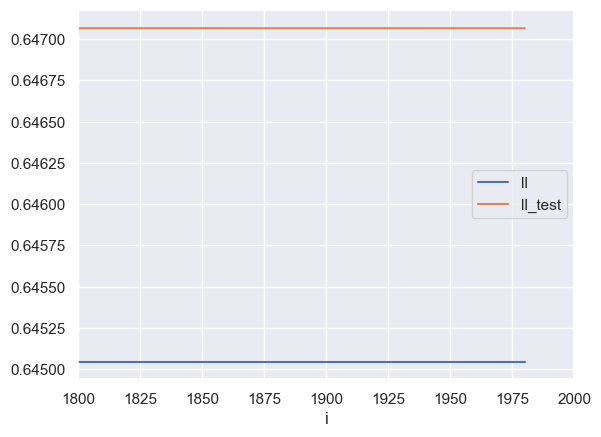

In [517]:
ax = stats[['ll', 'll_test']].plot()
ax.set_xlim(1800, 2000)
# [['ll', 'auc']].plot()

(1800.0, 2000.0)

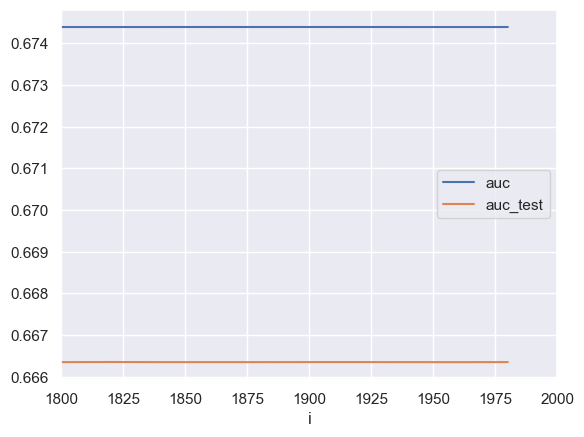

In [518]:
ax = stats[['auc', 'auc_test']].plot()
# ax.set_ylim(.98, 1), 
ax.set_xlim(1800, 2000)